In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/diabetes (1).csv")

In [2]:
df.shape

(768, 9)

In [3]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [5]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [9]:
columns = df.columns
columns = columns.drop("Outcome")

In [10]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [12]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [14]:
df.loc[(df['Outcome'] == 0 ) & (df["Pregnancies"].isnull()), "Pregnancies"]
df[(df['Outcome'] == 0 ) & (df["BloodPressure"].isnull())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [15]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
df.drop(['Pregnancies','SkinThickness'],axis=1,inplace=True)
df.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,169.5,33.6,0.627,50,1
1,85.0,66.0,102.5,26.6,0.351,31,0
2,183.0,64.0,169.5,23.3,0.672,32,1
3,89.0,66.0,94.0,28.1,0.167,21,0
4,137.0,40.0,168.0,43.1,2.288,33,1


In [17]:
Q1 = df["BloodPressure"].quantile(0.25)
Q3 = df["BloodPressure"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [18]:
lower

40.0

In [19]:
upper

104.0

In [20]:
for i in df:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if df[(df[i] > upper)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

Glucose no
BloodPressure no
Insulin yes
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


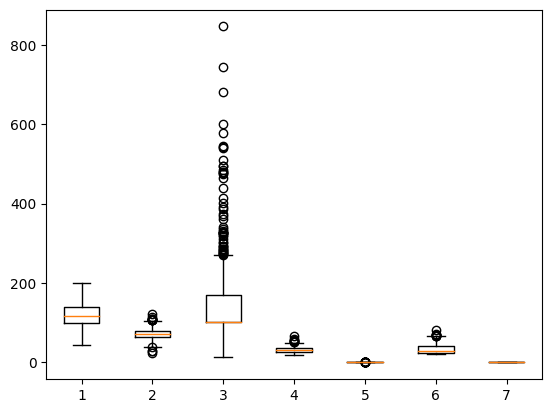

<Figure size 1000x700 with 0 Axes>

In [21]:
plt.boxplot(df)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [22]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,169.5,33.6,0.627,50,1
1,85.0,66.0,102.5,26.6,0.351,31,0
2,183.0,64.0,169.5,23.3,0.672,32,1
3,89.0,66.0,94.0,28.1,0.167,21,0
4,137.0,40.0,168.0,43.1,2.288,33,1


In [23]:
df.shape

(768, 7)

In [24]:
from sklearn.model_selection import train_test_split
a= df.drop(['Outcome'],axis=1)
b= df['Outcome']

In [25]:
a.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,169.5,33.6,0.627,50
1,85.0,66.0,102.5,26.6,0.351,31
2,183.0,64.0,169.5,23.3,0.672,32
3,89.0,66.0,94.0,28.1,0.167,21
4,137.0,40.0,168.0,43.1,2.288,33


In [30]:
a_train, a_test, b_train, b_test = train_test_split( a,b ,test_size=0.2,random_state=42)

In [32]:
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)


(614, 6)
(154, 6)
(614,)
(154,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic=LogisticRegression()
logistic.fit(a_train,b_train)

LogisticRegression()

In [34]:
b_pred=logistic.fit(a_train,b_train).predict(a_test)
acc=accuracy_score(b_test,b_pred)
print(acc)
print(classification_report(b_test,b_pred))

0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [35]:
print(confusion_matrix(b_test,b_pred))

[[80 19]
 [18 37]]


In [38]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
a_trains=scaler.fit_transform(a_train)
a_tests=scaler.transform(a_test)
logistic.fit(a_trains,b_train)
b_preds=logistic.predict(a_tests)

In [39]:
accs=accuracy_score(b_test,b_preds)
print(accs)
print(classification_report(b_test,b_preds))
print(confusion_matrix(b_test,b_preds))

0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

[[80 19]
 [18 37]]
